In [6]:
import pandas as pd 
df = pd.read_csv('D:\internsavy\Admission_Predict.csv', encoding = 'utf-8')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admit              400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
from sklearn.utils import shuffle
df_shuffled = shuffle (df, random_state = 42)
df_shuffled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
209,210,301,104,3,3.5,4.0,8.12,1,0.68
280,281,311,102,3,4.5,4.0,8.64,1,0.68
33,34,340,114,5,4.0,4.0,9.60,1,0.90
210,211,325,108,4,4.5,4.0,9.06,1,0.79
93,94,301,97,2,3.0,3.0,7.88,1,0.44


In [9]:
DV= 'Admit '
X = df_shuffled.drop(['Admit ','Serial No.'], axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1


In [10]:
Y=df_shuffled[DV]
Y.head()

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
Name: Admit , dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size = 0.33, random_state = 42)
X_train.head ()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
242,324,115,3,3.5,3.0,8.76,1
238,310,104,3,2.0,3.5,8.37,0
281,317,110,3,4.0,4.5,9.11,1
336,319,110,3,3.0,2.5,8.79,0
204,298,105,3,3.5,4.0,8.54,0


In [12]:
X_train.shape

(268, 7)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train[['GRE Score']], y_train)

LinearRegression()

In [14]:
intercept = model.intercept_
intercept

-2.385651572176142

In [15]:
coefficient = model.coef_
coefficient

array([0.00980279])

In [16]:
print ('Admit = (0:0.2f) + ((1:0.2f) x GRE Score) '.format (intercept, coefficient [0]))

Admit = (0:0.2f) + ((1:0.2f) x GRE Score) 


In [17]:
Admit = -2.62 + (0.01 * X_train ['GRE Score'])
Admit.head()

242    0.62
238    0.48
281    0.55
336    0.57
204    0.36
Name: GRE Score, dtype: float64

In [18]:
predictions = model.predict (X_test [ ['GRE Score']])
predictions.shape

(132,)

Text(0.5, 1.0, 'Predicted vs Actual Values (r =0:0.2f))')

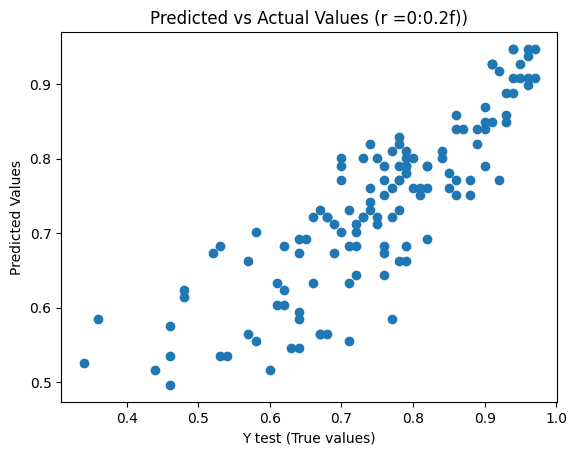

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions)
plt.xlabel('Y test (True values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (r =0:0.2f))'.format (pearsonr (y_test, predictions) [0]))


C:\Users\chithira\AppData\Local\Temp\ipykernel_18972\2983455648.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins = 50)


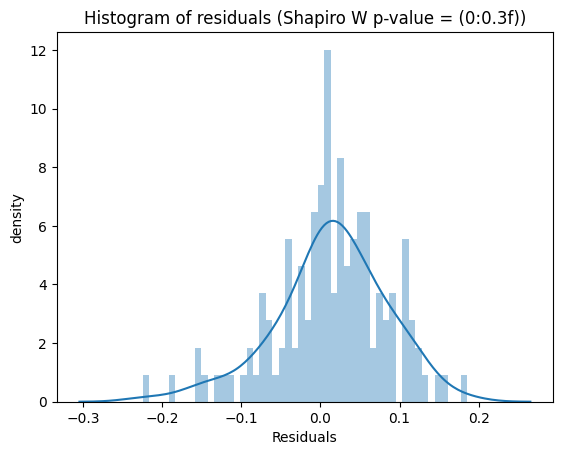

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
sns.distplot((y_test - predictions), bins = 50) 
plt.xlabel('Residuals')
plt.ylabel('density')
plt.title('Histogram of residuals (Shapiro W p-value = (0:0.3f))'.format(shapiro(y_test-predictions)[1]))
plt.show()